### KMeans

Import necessary packages


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import cv2
import utils
import os 
from tqdm import tqdm
import PIL
from PIL import Image

View image and histogram

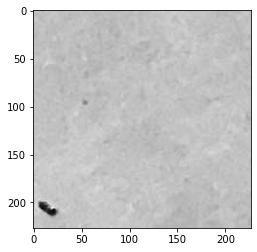

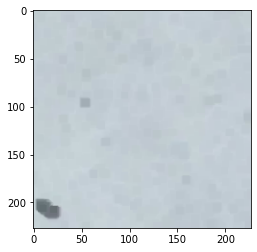

In [4]:
img_pos = cv2.imread("data/Negative/07146.jpg")

gray_pos = cv2.cvtColor(img_pos, cv2.COLOR_BGR2GRAY)
kernel = np.ones((7,7), np.uint8)
img_dilation = cv2.erode(img_pos, kernel, iterations=1)
plt.imshow(gray_pos, cmap="gray")
plt.show()
plt.imshow(img_dilation, cmap="gray")
plt.show()

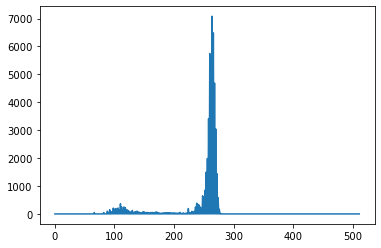

In [34]:
# img_pos = cv2.imread("data/Positive/00005.jpg")
# gray_pos = cv2.cvtColor(img_pos, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_pos)
# plt.show()
hist_pos = cv2.calcHist([img_dilation],[0],None,[512],[0,256])
plt.plot(hist_pos)
plt.show()

Convert to grayscale

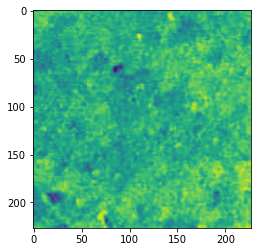

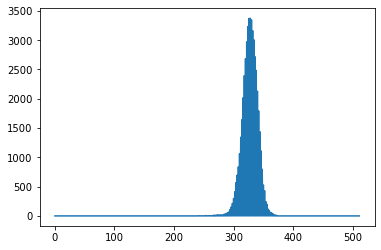

In [22]:
img_neg = cv2.imread("data/Negative/00006.jpg")

gray_neg = cv2.cvtColor(img_neg, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_neg)
plt.show()
hist_neg = cv2.calcHist([gray_neg],[0],None,[512],[0,256])
plt.plot(hist_neg)
plt.show()

Test OpenCV Kmeans

In [2]:
import numpy as np
import cv2

img = cv2.imread("data/Positive/00001.jpg")
Z = np.float32(img.reshape((-1,3)))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
_,labels,centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
labels = labels.reshape((img.shape[:-1]))
reduced = np.uint8(centers)[labels]

result = [np.hstack([img, reduced])]
for i, c in enumerate(centers):
    mask = cv2.inRange(labels, i, i)
    mask = np.dstack([mask]*3) # Make it 3 channel
    ex_img = cv2.bitwise_and(img, mask)
    ex_reduced = cv2.bitwise_and(reduced, mask)
    result.append(np.hstack([ex_img, ex_reduced]))

cv2.imwrite('out.jpg', np.vstack(result))

True

Plot histogram of KMeans result

2070 49459


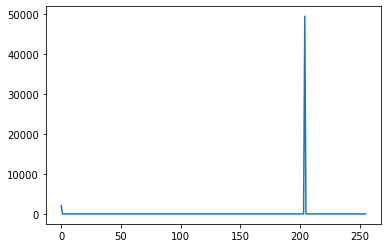

True

In [2]:
import numpy as np
import cv2

img = cv2.imread("data/Positive/01051.jpg")
Z = np.float32(img.reshape((-1,3)))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
_,labels,centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
labels = labels.reshape((img.shape[:-1]))
reduced = np.uint8(centers)[labels]

result = [np.hstack([img, reduced])]
for i, c in enumerate(centers):
    if i ==1:
        mask = cv2.inRange(labels, i, i)
        mask = np.dstack([mask]*3) # Make it 3 channel
        ex_img = cv2.bitwise_and(img, mask)
        ex_reduced = cv2.bitwise_and(reduced, mask)
        result.append(np.hstack([ex_img, ex_reduced]))
hist_neg = cv2.calcHist([ex_reduced],[0],None,[256],[0,256])
flat = ex_reduced.flatten()
cnt_crack=0
cnt=0
for x in range(0,len(flat),3):
    # print(x, flat[x:x+3])
    if (flat[x:x+3] == [0,0,0]).all():
        cnt_crack+=1
    else: 
        cnt+=1
print(cnt_crack, cnt)
plt.plot(hist_neg)
plt.show()
cv2.imwrite('watermelon_out.jpg', np.vstack(result))

Wrap to function

In [3]:
def test(img_path):
    img = Image.open(img_path)
    img = np.asarray(img)
    Z = np.float32(img.reshape((-1,3)))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    _,labels,centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    labels = labels.reshape((img.shape[:-1]))
    reduced = np.uint8(centers)[labels]

    result = [np.hstack([img, reduced])]
    for i, c in enumerate(centers):
        if i==0:
            mask = cv2.inRange(labels, i, i)
            mask = np.dstack([mask]*3) # Make it 3 channel
            ex_img = cv2.bitwise_and(img, mask)
            ex_reduced = cv2.bitwise_and(reduced, mask)
            result.append(np.hstack([ex_img, ex_reduced]))
    hist_neg = cv2.calcHist([ex_reduced],[0],None,[256],[0,256])
    flat = ex_reduced.flatten()
    cnt_crack=0
    cnt=0
    for x in range(0,len(flat),3):
        # print(x, flat[x:x+3])
        if (flat[x:x+3] == [0,0,0]).all():
            cnt_crack+=1
        else: 
            cnt+=1
    return [cnt_crack/(cnt+cnt_crack), 1- cnt_crack/(cnt+cnt_crack)]

Test with Positive images

In [4]:
import pandas as pd 
fs = os.listdir("data/Positive/")
res_list = []
f_list =[]
for f in tqdm(fs, desc="fs"):
    res = test("data/Positive/"+f)
    res_list.append(res)
    f_list.append(f)
dic = {"res":res_list,"img":f_list}
df =pd.DataFrame(dic)
df.to_csv("positive_opencv_kmeans.csv")

fs: 100%|██████████| 20000/20000 [1:51:20<00:00,  2.99it/s]


Test with Negative images

In [ ]:
import pandas as pd 
fs = os.listdir("data/Negative/")
res_list = []
f_list =[]
for f in tqdm(fs, desc="fs"):
    res = test("data/Negative/"+f)
    res_list.append(res)
    f_list.append(f)
dic = {"res":res_list,"img":f_list}
df =pd.DataFrame(dic)
df.to_csv("negative_opencv_kmeans.csv")

Try KMeans with sklearn and kmeans++

In [ ]:
from sklearn.cluster import KMeans
img = cv2.imread("data/Negative/16471.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# print(img)
img=img.reshape((img.shape[1]*img.shape[0],3))
kmeans=KMeans(n_clusters=2,init="k-means++")
s=kmeans.fit(img)
centroid=kmeans.cluster_centers_
print(centroid)
labels=list(kmeans.labels_)
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

Wrap to function

In [ ]:
def test_sklearn(img_path):
    img = cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=2,init="k-means++")
    s=kmeans.fit(img)
    centroid=kmeans.cluster_centers_
    labels=list(kmeans.labels_)
    percent=[]
    for i in range(len(centroid)):
        j=labels.count(i)
        j=j/(len(labels))
        percent.append(j)
    return max(percent)

Test with Positive images and save result to csv file since it takes long time for each run (20k images)

In [ ]:
import pandas as pd 
fs = os.listdir("data/Positive/")
res_list = []
f_list =[]
for f in tqdm(fs, desc="fs"):
    res = test_sklearn("data/Positive/"+f)
    res_list.append(res)
    f_list.append(f)
dic = {"res":res_list,"img":f_list}
df =pd.DataFrame(dic)
df.to_csv("positive.csv")

Test with Negative images and save result to csv file since it takes long time for each run (20k images)

In [ ]:
import pandas as pd 
fs = os.listdir("data/Negative/")
res_list = []
f_list =[]
for f in tqdm(fs, desc="fs"):
    res = test_sklearn("data/Negative/"+f)
    res_list.append(res)
    f_list.append(f)
dic = {"res":res_list,"img":f_list}
df =pd.DataFrame(dic)
df.to_csv("negative.csv")

Evaluate

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

threshold=0.75
df_pos = pd.read_csv('positive_opencv_kmeans.csv')
res_pos = df_pos.iloc[:,1]
# print(res.tolist()) 
cnt=0
positive_list = []
positive_label = np.ones((20000,)).astype(int)
for r in res_pos.tolist():
    # print(type(r))
    s = r[1:10]
    t=float(s)
    if t>=threshold:
        positive_list.append(1)
    else:
        positive_list.append(0)
        cnt+=1
postive_pred= np.array(positive_list)

df_neg = pd.read_csv('negative_opencv_kmeans.csv')
res_neg = df_neg.iloc[:,1]
cnt_neg=0
negative_list=[]
negative_label=np.zeros((20000,)).astype(int)
label = np.concatenate((positive_label, negative_label))
for r in res_neg.tolist():
    s = r[1:10]
    t=float(s)
    if t<threshold:
        negative_list.append(0)
    else:
        negative_list.append(1)
negative_pred= np.array(negative_list)
pred = np.concatenate((postive_pred, negative_pred))
print(classification_report(label, pred, target_names = ['Positive','Negative']))
print(confusion_matrix(label, pred))

### KMeans++

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import cv2
import utils
import os 
from tqdm import tqdm
import PIL
from PIL import Image

In [ ]:
img_pos = cv2.imread("data/Negative/10465.jpg")

gray_pos = cv2.cvtColor(img_pos, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_pos, cmap="gray")
plt.show()
hist_pos = cv2.calcHist([gray_pos],[0],None,[512],[0,256])
plt.plot(hist_pos)
plt.show()

Try KMeans with sklearn and kmeans++

In [ ]:
from sklearn.cluster import KMeans
img = cv2.imread("data/Negative/16471.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# print(img)
img=img.reshape((img.shape[1]*img.shape[0],3))
kmeans=KMeans(n_clusters=2,init="k-means++")
s=kmeans.fit(img)
centroid=kmeans.cluster_centers_
print(centroid)
labels=list(kmeans.labels_)
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

Wrap to function

In [ ]:
def test_sklearn(img_path):
    img = cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=2,init="k-means++")
    s=kmeans.fit(img)
    centroid=kmeans.cluster_centers_
    labels=list(kmeans.labels_)
    percent=[]
    for i in range(len(centroid)):
        j=labels.count(i)
        j=j/(len(labels))
        percent.append(j)
    return max(percent)

Test with Positive images and save result to csv file since it takes long time for each run (20k images)

In [ ]:
import pandas as pd 
fs = os.listdir("data/Positive/")
res_list = []
f_list =[]
for f in tqdm(fs, desc="fs"):
    res = test_sklearn("data/Positive/"+f)
    res_list.append(res)
    f_list.append(f)
dic = {"res":res_list,"img":f_list}
df =pd.DataFrame(dic)
df.to_csv("positive.csv")

Test with Negative images and save result to csv file since it takes long time for each run (20k images)

In [ ]:
import pandas as pd 
fs = os.listdir("data/Negative/")
res_list = []
f_list =[]
for f in tqdm(fs, desc="fs"):
    res = test_sklearn("data/Negative/"+f)
    res_list.append(res)
    f_list.append(f)
dic = {"res":res_list,"img":f_list}
df =pd.DataFrame(dic)
df.to_csv("negative.csv")

Evaluate

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

threshold=0.8
df_pos = pd.read_csv('positive.csv')
res_pos = df_pos.iloc[:,1]
# print(res.tolist()) 
cnt=0
positive_list = []
positive_label = np.ones((20000,)).astype(int)
for r in res_pos.tolist():
    if r>=threshold:
        positive_list.append(1)
    else:
        positive_list.append(0)
        cnt+=1
postive_pred= np.array(positive_list)

df_neg = pd.read_csv('negative.csv')
res_neg = df_neg.iloc[:,1]
cnt_neg=0
negative_list=[]
negative_label=np.zeros((20000,)).astype(int)
label = np.concatenate((positive_label, negative_label))
for r in res_neg.tolist():
    if r<threshold:
        negative_list.append(0)
    else:
        negative_list.append(1)
negative_pred= np.array(negative_list)
pred = np.concatenate((postive_pred, negative_pred))
print(classification_report(label, pred, target_names = ['Positive','Negative']))
print(confusion_matrix(label, pred))

### CNN

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
# %tensorflow_version 1.x
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
print(tf.__version__)

With generator

Split train test

In [ ]:
import shutil
cnt=0
for f in os.listdir("/content/data/train/Positive"):
  if cnt<=1000:
    shutil.move("/content/data/train/Positive/"+f, "/content/data/test/Positive/"+f)
    cnt+=1
cnt=0
for f in os.listdir("/content/data/train/Negative"):
  if cnt<=1000:
    shutil.move("/content/data/train/Negative/"+f, "/content/data/test/Negative/"+f)
    cnt+=1
  

Create CNN

model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = (120,120,1)))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Create image generator for train and valid

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        rotation_range=40,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


Load images to train and validation generator


In [ ]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
        '/content/data/train',  
        target_size=(120,120),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        '/content/data/valid',
        target_size=(120,120),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='binary')
# import pandas as pd
# pd.get_dummies(pd.Series(validation_generator.classes))
print(validation_generator.class_indices)

Choose parameters, compiling model and train


In [ ]:
opt = Adam(lr=0.0005)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

checkpoint_path = "/content/drive/MyDrive/CVcourse/training/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit_generator(train_generator,
                              steps_per_epoch=len(train_generator) // batch_size, 
                              validation_data=validation_generator,
                              verbose=1, 
                              epochs = 200,
                              callbacks=[model_checkpoint_callback],
                              validation_steps=len(validation_generator) // batch_size
                              )

Plot accurcay and loss graph


In [ ]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

Create image generator for test and evaluate model

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        "/content/data/test",
        target_size=(120, 120),
        color_mode="grayscale",
        shuffle = False,
        class_mode='binary',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)
predictions = np.argmax(predict,axis=1)

print(classification_report(test_generator.classes, predictions, target_names = ['Negative','Positive']))
print(confusion_matrix(test_generator.classes, predictions))

Without generator

Load image

In [ ]:
labels = ['Negative', 'Positive']
img_size = 120
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset_origin = read_images("/content/data/train")
Dataset_valid = read_images("/content/data/valid")
Dataset_test = read_images("/content/data/test")

Images data to array x contains feature, y contains label

In [ ]:
x = []
y = []

for feature, label in Dataset_origin:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)
x_val = []
y_val = []

for feature, label in Dataset_valid:
    x_val.append(feature)
    y_val.append(label)

x_val = np.array(x_val).reshape(-1, img_size, img_size, 1)
x_val = x_val / 255
y_val = np.array(y_val)

Visualize data distribution

In [ ]:
Im = []
for i in Dataset_origin:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

Creating CNN

In [ ]:
model_origin = Sequential()
model_origin.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model_origin.add(MaxPool2D())

model_origin.add(Conv2D(64, 3, padding="same", activation="relu"))
model_origin.add(MaxPool2D())

model_origin.add(Conv2D(128, 3, padding="same", activation="relu"))
model_origin.add(MaxPool2D())

model_origin.add(Flatten())
model_origin.add(Dense(256,activation="relu"))
model_origin.add(Dropout(0.5))
model_origin.add(BatchNormalization())
model_origin.add(Dense(2, activation="softmax"))

model_origin.summary()

Setting parameter, compile and train

In [ ]:
opt = Adam(lr=1e-5)

model_origin.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history_origin = model_origin.fit(x, y, validation_data=(x_val, y_val), epochs = 15, batch_size = 128, verbose=1)

PLot accuracy and loss graph

In [ ]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

Load test images

In [ ]:
x_test = []
y_test = []

for feature, label in Dataset_test:
    x_test.append(feature)
    y_test.append(label)

x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
x_test = x_test / 255
y_test = np.array(y_test)

Evaluate model

In [ ]:
predictions = model_origin.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['Negative','Positive']))
print(confusion_matrix(y_test, predictions))

### VGG-16

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model,layers
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

Exclude test set from the original dataset

In [ ]:
import os
import shutil
cnt=0
for f in os.listdir("/content/data/train/Positive"):
  if cnt<=1000:
    shutil.move("/content/data/train/Positive/"+f,"/content/data/test/Positive/"+f)
    cnt+=1
cnt=0
for f in os.listdir("/content/data/train/Negative"):
  if cnt<=1000:
    shutil.move("/content/data/train/Negative/"+f,"/content/data/test/Negative/"+f)
    cnt+=1


Preparing the Dataset

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        if len(images) == 4:
            break
            
    fig=plt.figure(figsize=(10,12))
    
    for img,x in zip(images,range(1, 5)):
        ax=fig.add_subplot(1, 4, x)
        ax.imshow(img)
        ax.set_title(img.shape)

Load pretrained VGG-16 model

In [ ]:
from tensorflow.keras.applications import VGG16

weights_file='/content/drive/MyDrive/CVcourse/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model=VGG16(input_shape = (128, 128, 3), 
                        include_top = False, 
                        weights =None)

pretrained_model.load_weights(weights_file)

for layer in pretrained_model.layers:
     layer.trainable = False

pretrained_model.summary()


Add fully connected layers to the network:
- Flatten
- Dense layer with 256 node and relu activation
- Drop out with the rate of 0.4
- softmax layer with 2 node

In [ ]:
last_layer = pretrained_model.get_layer('block5_pool')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.4)(x)                  
x = layers.Dense(2, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 

model_vgg.summary()
model_vgg.compile(optimizer = Adam(lr=0.0005), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

Split dataset to trainning and validation subset

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory('/content/data/train',
                                                     target_size=(128,128),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     class_mode='binary',
                                                     subset='training') 

validation_generator =  train_datagen.flow_from_directory('/content/data/train',
                                                                target_size=(128,128),
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                subset='validation')  

Train model with 10 epochs

In [ ]:
history = model_vgg.fit_generator(train_generator,
                                  validation_data = validation_generator,
                                  steps_per_epoch = 64,
                                  epochs = 10,
                                  verbose = 1)

Plot the trainning experiments

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

Testing and evaluate the model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        "/content/data/test",
        target_size=(128, 128),
        shuffle = False,
        class_mode='binary',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model_vgg.predict_generator(test_generator,steps = nb_samples)
predictions = np.argmax(predict,axis=1)
print(classification_report(test_generator.classes, predictions, target_names = ['Negative','Positive']))
print(confusion_matrix(test_generator.classes, predictions))